In [63]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=720)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('AAPL', 
                      start=start_date,
                      end=end_date,
                      progress=False)
print(data.head())
                   

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-04-12  132.520004  132.850006  130.630005  131.240005  129.679016   
2021-04-13  132.440002  134.660004  131.929993  134.429993  132.831085   
2021-04-14  134.940002  135.000000  131.660004  132.029999  130.459641   
2021-04-15  133.820007  135.000000  133.639999  134.500000  132.900238   
2021-04-16  134.300003  134.669998  133.279999  134.160004  132.564301   

              Volume  
Date                  
2021-04-12  91420000  
2021-04-13  91266500  
2021-04-14  87222800  
2021-04-15  89347100  
2021-04-16  84922400  


In [64]:
import plotly.express as px
figure = px.line(data, x = data.index, 
                 y = "Close", 
                 title = "Time Series Analysis (Line Plot)")
figure.show()

In [65]:
import plotly.graph_objects as go
figure = go.Figure(data=[go.Candlestick(x = data.index,
                                        open = data["Open"], 
                                        high = data["High"],
                                        low = data["Low"], 
                                        close = data["Close"])])
figure.update_layout(title = "Time Series Analysis (Candlestick Chart)", 
                     xaxis_rangeslider_visible = False)
figure.show()

In [66]:
figure = px.bar(data, x = data.index, y = "Close", title = "Time Series Analysis (Bar Plot)" )
figure.show()


In [67]:
figure = go.Figure(data = [go.Candlestick(x = data.index,
                                        open = data["Open"], 
                                        high = data["High"],
                                        low = data["Low"], 
                                        close = data["Close"])])
figure.update_layout(title = "Time Series Analysis (Candlestick Chart with Buttons and Slider)")

figure.update_xaxes(
    rangeslider_visible = True,
    rangeselector = dict(
        buttons = list([
            dict(count = 1, label = "1m", step = "month", stepmode = "backward"),
            dict(count = 6, label = "6m", step = "month", stepmode = "backward"),
            dict(count = 1, label = "YTD", step = "year", stepmode = "todate"),
            dict(count = 1, label = "1y", step = "year", stepmode = "backward"),
            dict(step = "all")
        ])
    )
)

In [68]:
data["Date"] = data.index
data.reset_index(drop=True, inplace=True)
print(data.tail())

           Open        High         Low       Close   Adj Close    Volume  \
493  159.940002  160.770004  157.869995  158.279999  158.279999  52390300   
494  157.970001  158.490005  155.979996  157.649994  157.649994  45992200   
495  159.369995  161.050003  159.350006  160.770004  160.770004  51305700   
496  161.529999  162.470001  161.270004  162.360001  162.360001  49501700   
497  162.440002  165.000000  161.910004  164.899994  164.899994  68694700   

          Date  
493 2023-03-27  
494 2023-03-28  
495 2023-03-29  
496 2023-03-30  
497 2023-03-31  


In [69]:
data = data[["Date", "Close"]]
print(data.tail())

          Date       Close
493 2023-03-27  158.279999
494 2023-03-28  157.649994
495 2023-03-29  160.770004
496 2023-03-30  162.360001
497 2023-03-31  164.899994


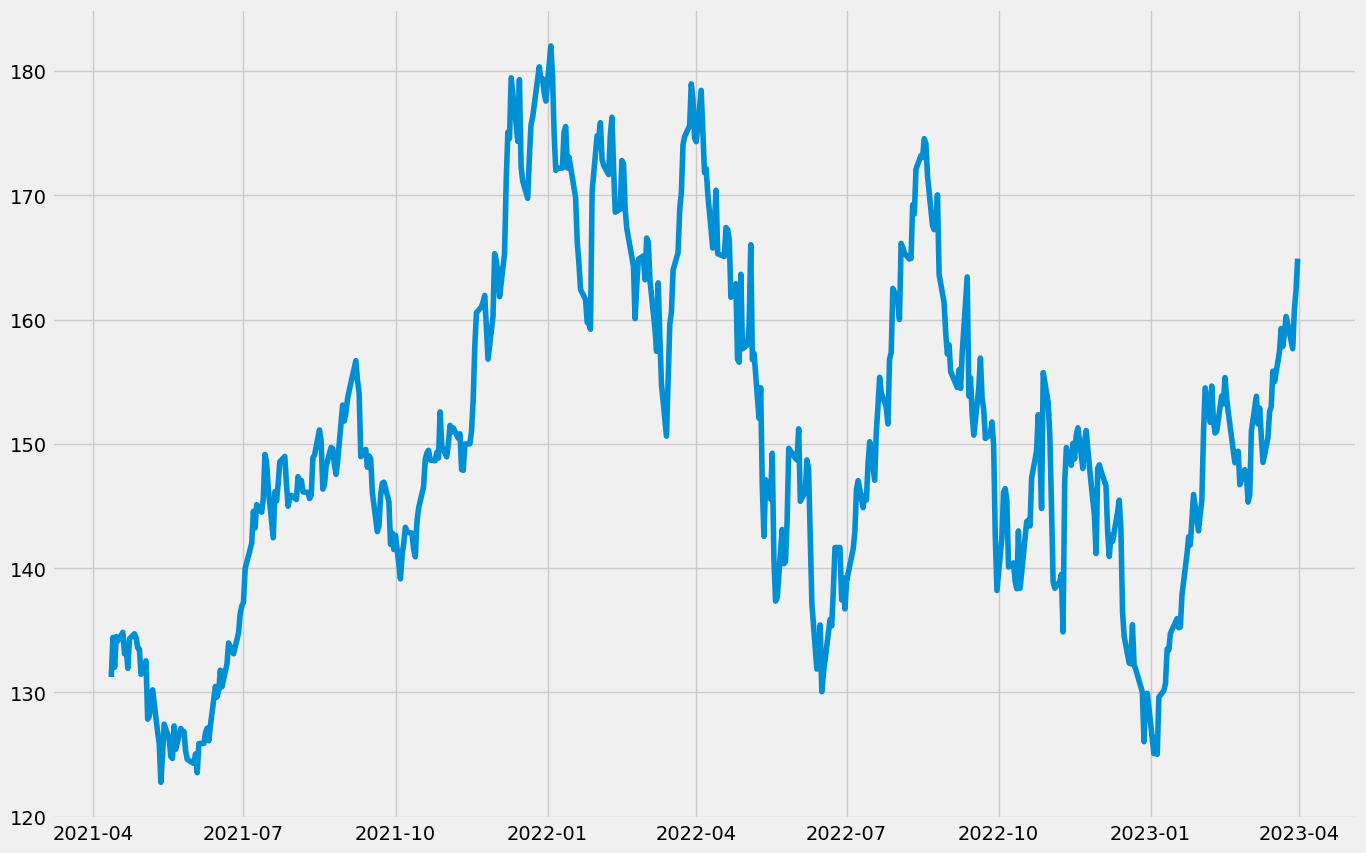

In [70]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Close"])

<Figure size 640x480 with 0 Axes>

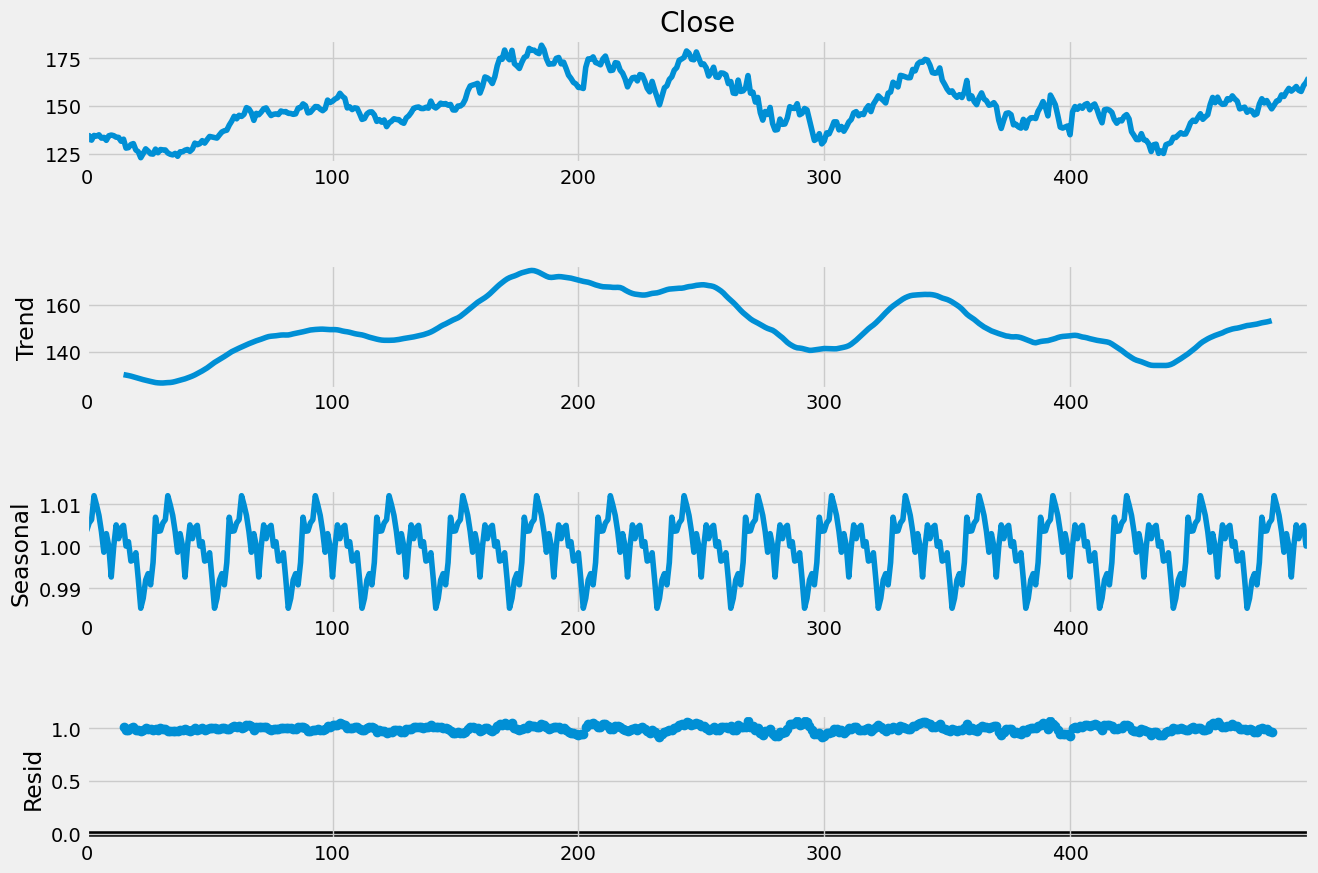

In [82]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["Close"], 
                            model='multiplicative', period=30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

<AxesSubplot: xlabel='Lag', ylabel='Autocorrelation'>

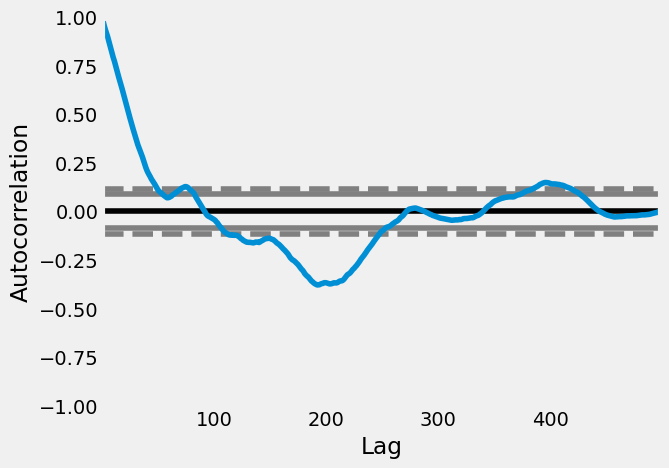

In [83]:
pd.plotting.autocorrelation_plot(data["Close"])

C:\Python3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



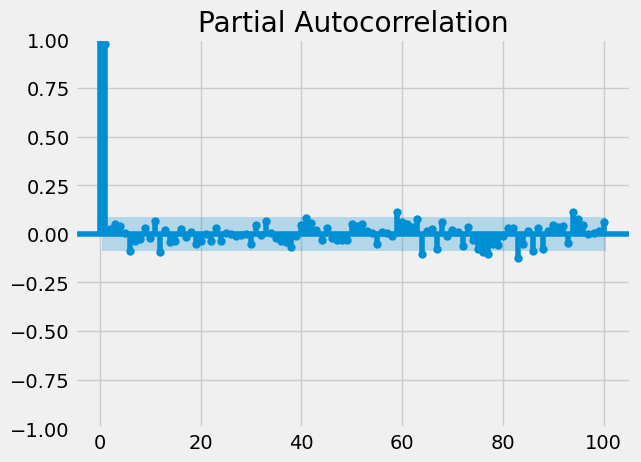

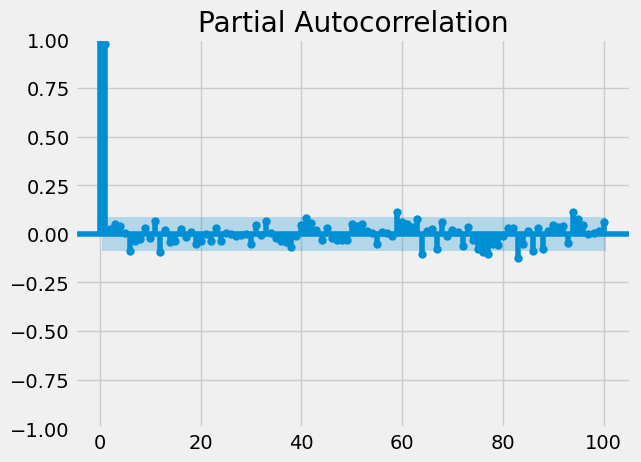

In [84]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Close"], lags = 100)

In [86]:
p, d, q = 5, 1, 2
import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(data['Close'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

C:\Python3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  498
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood               -1216.467
Date:                            Sun, 02 Apr 2023   AIC                           2462.935
Time:                                    11:57:06   BIC                           2525.697
Sample:                                         0   HQIC                          2487.594
                                            - 498                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9530      0.165      5.779      0.000       0.630       1.276
ar.L2         -0.8413      0.166   

In [175]:
predictions = model.predict(len(data), len(data)+20)
print(predictions)

498    164.184006
499    163.435308
500    163.420494
501    164.390585
502    164.787131
503    164.812352
504    164.664954
505    164.378378
506    165.042635
507    164.874996
508    164.571202
509    164.905815
510    164.525111
511    164.111431
512    164.035628
513    164.783454
514    165.183237
515    165.010308
516    165.199826
517    164.848415
518    165.157159
Name: predicted_mean, dtype: float64


<AxesSubplot: >

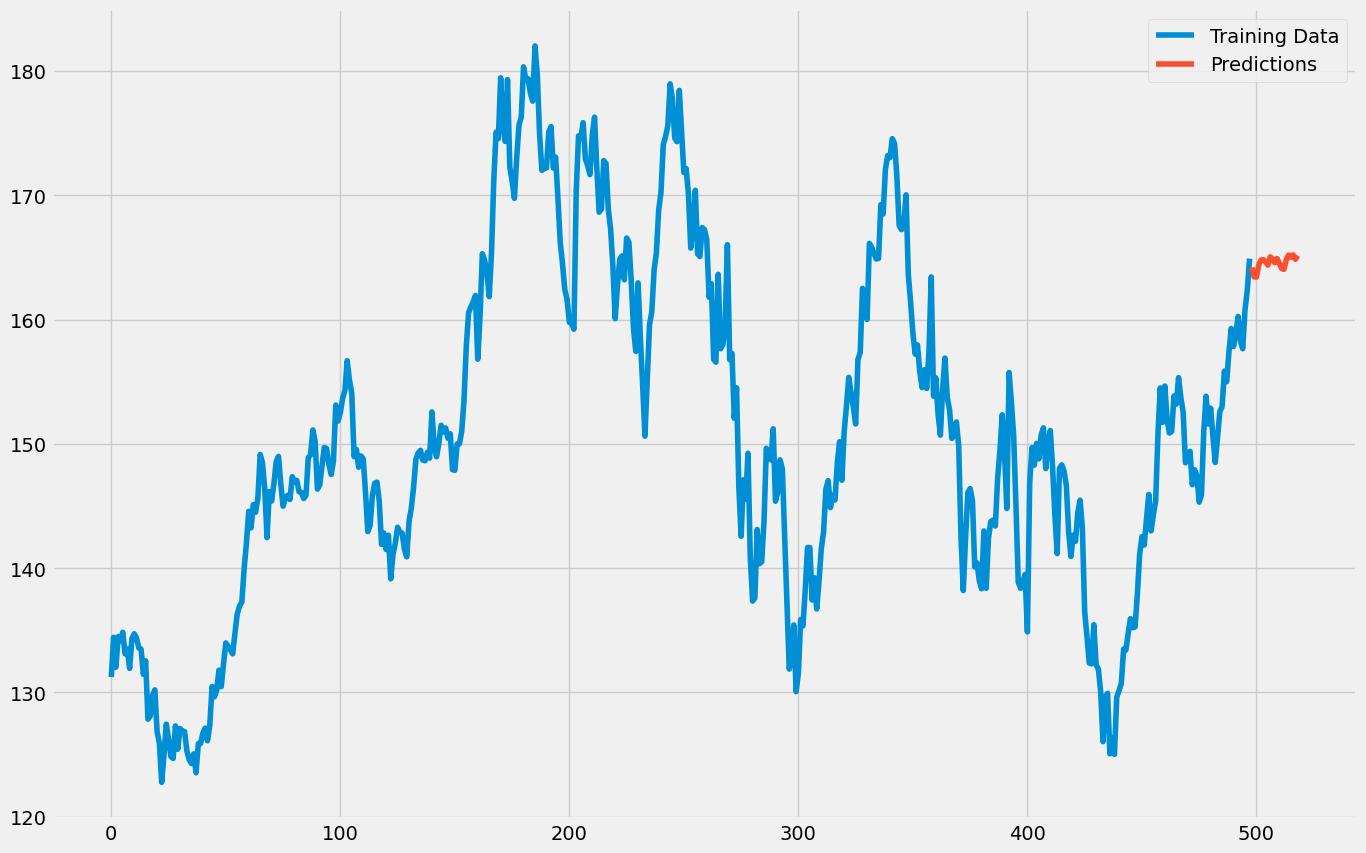

In [176]:
data["Close"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")

In [181]:
new_data = pd.concat([data['Close'], predictions])
new_data = pd.DataFrame({"test":new_data.index, "Close":new_data.values})
new_data["test"] = data["Date"]


date_insert = today - timedelta(1)

for i in range(data.index[-1] + 1, new_data.index[-1] + 1):
    new_data["test"].iloc[i] = date_insert
    date_insert = date_insert + timedelta(1)
    
print(new_data.tail(25))

figure = px.line(new_data, x = new_data.index, 
                 y = "Close", 
                 title = "Time Series Analysis (Line Plot)")
figure.show()

C:\Users\Alexey\AppData\Local\Temp\ipykernel_88180\1492199380.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



                    test       Close
494  2023-03-28 00:00:00  157.649994
495  2023-03-29 00:00:00  160.770004
496  2023-03-30 00:00:00  162.360001
497  2023-03-31 00:00:00  164.899994
498           2023-04-01  164.184006
499           2023-04-02  163.435308
500           2023-04-03  163.420494
501           2023-04-04  164.390585
502           2023-04-05  164.787131
503           2023-04-06  164.812352
504           2023-04-07  164.664954
505           2023-04-08  164.378378
506           2023-04-09  165.042635
507           2023-04-10  164.874996
508           2023-04-11  164.571202
509           2023-04-12  164.905815
510           2023-04-13  164.525111
511           2023-04-14  164.111431
512           2023-04-15  164.035628
513           2023-04-16  164.783454
514           2023-04-17  165.183237
515           2023-04-18  165.010308
516           2023-04-19  165.199826
517           2023-04-20  164.848415
518           2023-04-21  165.157159
